## ロジスティック回帰スクラッチ
ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

### 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$ 
g
(
z
)
=
\frac
{1}
{1
+
e
^{−
z
.}}
$$ 

線形回帰の仮定関数は次の式でした。

$$
h
θ
(
x
)
=
θ
T
⋅
x
.
$$
まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
h
θ
(
x
)
=
\frac
{1}
{1
+
e
^
{−
θ
T
⋅
x
.}}
$$

x
 : 特徴量ベクトル

θ
 : パラメータ（重み）ベクトル

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import StandardScaler
import math


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
y.columns = ["Species"]
df = pd.concat([X , y] , axis = 1)

In [5]:
df_cn = df.query("Species == [1,2]").loc[: , :]
X = df_cn.iloc[: , :4].values
y = df_cn.iloc[: , -1].values

In [6]:
y[y==2]=0
#yを0,1にしなければ計算に誤差が生まれる

In [7]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter = 100, lr = 0.01, bias = True, verbose = True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

In [8]:
def _linear_hypothesis(X):
    theta = np.random.rand(X.shape[1] + 1)
    one = np.ones(X.shape[0]).reshape(-1 , 1)
    X = np.concatenate([one , X] , axis = 1)
    z = np.dot(X , theta)
    h = 1 / (1 + np.exp(-z))
    return h

In [9]:
print("仮定仮説:{}".format(_linear_hypothesis(X)))

仮定仮説:[0.99998434 0.99997637 0.9999859  0.99989014 0.99997358 0.99995067
 0.99998116 0.99970433 0.9999733  0.99989738 0.9996943  0.99995607
 0.99989201 0.99996979 0.99990096 0.99997534 0.99995931 0.99991808
 0.99995182 0.99988701 0.99997981 0.99994091 0.99997215 0.99996366
 0.99996247 0.99997238 0.99997949 0.9999864  0.99996499 0.99985319
 0.99986312 0.9998425  0.99991536 0.99997678 0.99995478 0.99997571
 0.99998168 0.99994735 0.999937   0.9999027  0.99992878 0.99996926
 0.99991684 0.99970198 0.99993011 0.9999412  0.99994128 0.99995829
 0.99970233 0.99993252 0.99999611 0.99997858 0.99999576 0.99998952
 0.99999408 0.99999812 0.99992956 0.99999643 0.99999075 0.99999813
 0.99998973 0.99998665 0.9999932  0.99997408 0.99998521 0.99999231
 0.9999904  0.99999904 0.99999841 0.99996381 0.99999568 0.99997537
 0.99999801 0.99997952 0.99999489 0.99999603 0.99997803 0.99998103
 0.99999123 0.99999406 0.99999604 0.99999877 0.99999176 0.99998016
 0.99998209 0.99999766 0.99999467 0.99999048 0.99997838 0

### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\<br/>\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\<br/>\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$
α
  : 学習率

i
 : サンプルのインデックス

j
 : 特徴量のインデックス

m
 : 入力されるデータの数

h
θ
(
)
 : 仮定関数

x
 : 特徴量ベクトル

θ
 : パラメータ（重み）ベクトル

x
(
i
)
 : i番目のサンプルの特徴量ベクトル

y
(
i
)
 : i番目のサンプルの正解ラベル

θ
j
 : j番目のパラメータ（重み）

λ
 : 正則化パラメータ


In [327]:
# y = np.arange(4)
# print(y)
# print(y.shape)

In [12]:
def error(h , y):
    return h - y

In [13]:
def _gradient_descent(X ,y , lr = 0.01, bias = True):
    theta = np.random.rand(X.shape[1] + 1)
    one = np.ones(X.shape[0]).reshape(-1 , 1)
    X = np.concatenate([one , X] , axis = 1)
    if bias:
        theta_copy =  theta.copy()
        theta_copy[0] = 0
        theta = np.dot((error(_linear_hypothesis(X) , y)) , X ) / X.shape[0] + lr * theta_copy / X.shape[0]
        return theta
    else:
        theta = np.dot((error(_linear_hypothesis(X) , y)) , X ) / X.shape[0] + lr * theta /X.shape[0]
        return theta

In [14]:
_gradient_descent(X , y)

array([0.49993666, 3.29366444, 1.48683991, 2.77575901, 1.01292796])

### 【問題3】推定

推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 
h
θ
(
x
)
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。



In [16]:
def predict(X):
        y_pred = _linear_hypothesis(X)
        list_ = []
        for i in y_pred:
            if i < 0.5:
                list_.append(0)
            elif i > 0.5:
                list_.append(1)
        return list_
    

In [17]:
def predict_proba(X):
    y_pred = _linear_hypothesis(X)
    return y_pred

In [18]:
def predict(X):
    
    return np.where(_linear_hypothesis(X) < 0.5 , 0 , 1)

### 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

なお、この数式には正則化項が含まれています。

$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\
$$


In [19]:
theta = np.random.rand(X.shape[1] + 1)
def j_loss(X , y , lr = 0.01):
    loss = np.sum(-y * np.log(_linear_hypothesis(X)) - (1 - y) * np.log(1 - _linear_hypothesis(X))) / X.shape[0] +( lr / (2 * X.shape[0])) * np.sum(theta ** 2)
    return loss

In [20]:
j_loss(X , y)

5.122047314155122

## 検証

### 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [339]:
# from sklearn.datasets import load_iris
# # アイリスデータを変数に格納
# iris_dataset = load_iris()
# # pandas データに変換。その際にカラム名も指定する。
# X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

# # pandasデータに変換。目的変数（ターゲット）が対象。
# y = pd.DataFrame(iris_dataset.target, columns=["Species"])

# print("種類の名前 : {}".format(iris_dataset.target_names))

# df = pd.concat([X, y], axis=1)
# df.head()


In [340]:
# X=X[50:]
# X

In [341]:
#y = y.query("Species == [1, 2]")


In [22]:
from sklearn.model_selection import train_test_split

#X = (X - X.mean() ) / X.std() 
X_train , X_test , y_train , y_test = train_test_split(
               X , y , test_size = 0.2)

In [23]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter = 100 , lr = 0.01, bias = True , verbose = True,  lam=0.01):
        self.h = None
        self.theta = None
        
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lam = lam
    
    def _linear_hypothesis(self , X):
        z = np.dot(X , self.theta)
        self.h = 1 / (1 + np.exp(-z))
        return self.h
    
    def _get_error(self, h , y):
        return self.h - y

    def _gradient_descent(self , X , error):
        if self.bias:
            theta_copy =  self.theta.copy()
            theta_copy[0] = 0
            self.theta -= self.lr * np.dot(self.error , X ) / X.shape[0] + self.lam * theta_copy / X.shape[0]
            return self.theta
        else:
            self.theta -= self.lr * np.dot(self.error , X ) / X.shape[0] + self.lam * self.theta /X.shape[0]
            return self.theta
        
    def _get_j_loss(self , X , y ):
        
        cross = np.sum(-y * np.log(self.h) - (1 - y) * np.log(1 - self.h)) / X.shape[0]
        reg = ( self.lam* np.sum(self.theta ** 2) / (2 * X.shape[0])) 
        self.l  = cross + reg
        
        #print('cross',cross)
        #print('reg',reg)
        #self.l = np.sum(-y * np.log(self.h) - (1 - y) * np.log(1 - self.h)) / X.shape[0] +( self.lam* np.sum(self.theta ** 2) / (2 * X.shape[0])) 
        return self.l
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        if self.bias:
            self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            X = np.concatenate([self.one , X] , axis = 1)
            
            if X_val is not None:
                self.one = np.ones(X_val.shape[0]).reshape(-1 , 1)
                X_val = np.concatenate([self.one , X_val] , axis = 1)
        np.random.seed(0)
        self.theta = np.random.rand(X.shape[1] )
        
        for i in range(self.iter):
            self.h = self._linear_hypothesis(X)
            #print('h:',self.h)
            self.error = self._get_error(self.h , y)
            #print('error',self.error)
            self._gradient_descent(X , self.error)
            #print('theta',self.theta)
            self.j_loss = self._get_j_loss( X , y )
            self.loss[i] = self.j_loss
            
            if X_val is not None:
                self.h_val = self._linear_hypothesis(X_val)
                self.j_loss_val = self._get_j_loss( X_val , y_val )
                self.val_loss[i] = self.j_loss_val

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            X = np.concatenate([self.one , X] , axis = 1)
        z = np.dot(X , self.theta)
        self.h = 1 / (1 + np.exp(-z))
        
        return np.where(self.h < 0.5 , 0 , 1)
        #list_ = []
        #for i in self.h:
            #if i < 0.5:
                #list_.append(0)
            #elif i > 0.5:
                #list_.append(1)
        #return list_


    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        
        return self.h

In [25]:
from sklearn.model_selection import train_test_split

#X = (X - X.mean() ) / X.std() 
X_train , X_test , y_train , y_test = train_test_split(
               X , y , test_size = 0.2)

In [26]:

slr = ScratchLogisticRegression(lr = 0.1, num_iter = 10000,  lam=0.01)


In [28]:
slr.fit(X_train , y_train , X_test , y_test)

[5.44865858 3.26231363 1.20548942 ... 0.10421655 0.10421585 0.10421515]


### 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

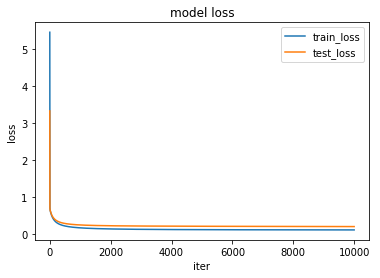

In [29]:
plt.plot(np.arange(1 , len(slr.loss) + 1) , slr.loss , label = "train_loss")
plt.plot(np.arange(1 , len(slr.val_loss) + 1) , slr.val_loss , label = "test_loss")
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()
plt.show()

In [30]:
slr.predict_proba(X_test)
y_train
y_pred = slr.predict(X_test)

In [34]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [35]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score ,  confusion_matrix

In [36]:
def learn_model(X , y , model = slr):
    X_train , X_test , y_train , y_test = train_test_split(
                  X[:,1:3] , y , test_size = 0.2)
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test , y_pred)
    pre_score = precision_score(y_test , y_pred)
    re_score = recall_score(y_test , y_pred)
    f_score = f1_score(y_test , y_pred)
    con_mat = confusion_matrix(y_test , y_pred)
    
    print("accuracy_score :" , score)
    print("precision_score :" , pre_score)
    print("recall_score :" , re_score)
    print("f1_score :" , f_score)
    print("confusion_matrix :" , con_mat)

In [37]:
learn_model(X , y)

[2.93709792 2.00176727 1.17589358 ... 0.21415726 0.21415411 0.21415096]
accuracy_score : 0.9
precision_score : 0.8888888888888888
recall_score : 0.8888888888888888
f1_score : 0.8888888888888888
confusion_matrix : [[10  1]
 [ 1  8]]


### 問題7】決定領域の可視化
決定領域を可視化してください。

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o" , "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [39]:
y_train

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [40]:
slr.fit(X_train[:,1:3] , y_train)

[3.00234017 2.02244642 1.16279239 ... 0.24021449 0.24021157 0.24020865]


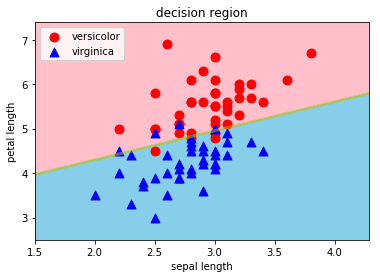

In [41]:
decision_region(X_train[:,1:3] , y_train , slr ,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'] )